<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

Experiments of this week:
- experiment 12A: Simulate and build a non-inverting opamp
- experiment 12B: Simulate and build an inverting opamp
- experiment 12C: Build a current to voltage converter and understand how it works

Goal: In these experiments we will explore the basic OPAMP circuits and learn about the photodiode. There are two basic OPAMP circuits, the inverting and the non-inverting amplifier, most other OPAMP based circuits are derived from these two circuits. These circuits work for both AC and DC signals. During the experiments we will see what the difference is between AC-coupling and DC-coupling of signals, as well.
OPAMPs are very often used in conjunction with sensors. Example of a sensor, often used in biochemical systems, is the photodiode. The photodiode is sensitive to light. It can be read out in two different modes; voltage mode and current mode. In voltage mode it will act as a “solar cell”, this gives with low light intensity already a voltage. However, the voltage mode is not linear. When used as an intensity sensor, with high linearity, the current mode is more suited. In order to convert the photocurrent to a voltage, a circuit with an OPAMP is used, the current to voltage converter.


Structure of an experiment:
- Background+Anticipate+ Simulate (15+15+15):  per person
- Implement + Investigate(60):  with your partner (group of 2)
- Compare + Conclude(15):  with a group of 4 (per table)

# 12A: Non inverting amplifier
> <font color='blue'>Learning goal:</font> understand the workings and properties of a non inverting opamp. Use simulation and build a circuit on Alpaca involving the amplifier.

## BACKGROUND
> <font color='grey'>⏳ Estimated time: 15 min</font>

The Operational Amplifier is actually a circuit on its own. It is an **integrated** circuit, which means that is composed of dozens of transistors, resistors, diodes and capacitors, these are build on a silicon chip. An OPAMP is an **active component**, which means that it needs energy in order to function. This is contrary to capacitors, resistors and inductors, these components do not need an extra energy-source in order to work properly. 

The energy needed for the OPAMP to work is supplied by a power supply. On the ALPACA this means the OPAMP needs the +12V and the -12V. Without these power supplies connected, the OPAMP can not be used. As this is such a logical thing, the power supply lines are very often not drawn in the circuit, advantage of this omission is less clutter in the schematic diagram. However, **never forget to connect the power supply pins when building a circuit**!

A powered OPAMP will behave as an amplifier with a coarsely defined, but enormous high gain. This high gain makes the component on its own rather useless, but with the proper extra circuitry around it, it will make a very useful circuit e.g. an amplifier. The extra components used are passive components, very often a few resistors. By feeding a part of the output signal back to the input, in counter phase, we can “tame” the OPAMP. Nice thing is that in this scenario, the resistors determine the total behavior of the circuit.
One of the basic-forms of these circuits is a non-inverting amplifier, which is shown below <br>


<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/12A%20general%20non%20inverting%20amplifier%20circuit.png" width="500"/>
<

By changing the value of the resistors we can determine the amplification factor of the circuit, the gain is the ratio “Uout/Uin”.
When the circuit works properly, the so called “zero-conditions” apply. In short:
- there is no voltage difference between the input marked “+” (non-inverting input) and the one marked “-” (inverting input)
- there is no current flowing into the input-pins of the OP


A third zero condition, often not mentioned, is that the output behaves as a voltage source with “zero ohm” output impedance.

An OPAMP is designed to be as ideal as possible. Therefore special (internal) components are selected at the input of the OPAMP which require basically no current on their inputs to operate. As there is next to none current flowing the **input-impedance or resistance is very high**. A value in the Giga-Ohm range is not an exception.

The output of the OPAMP is constructed such that it behaves as a voltage source. This means it has a very low internal resistance. Just a side-note: the output is current limited till ~25mA, but as long as the current stays below this threshold the **output can be regarded as a voltage source with zero Ohm internal resistance**.

Based on the above characteristics, an OPAMP is used very often as a **“buffer”**. A buffer amplifies the signal with a factor of one (0 dB). So the signal coming out has the same amplitude as the signal coming in. However, the signal is fed into an input with very high resistance, so it is not loading the source (e.g. a sensor). The output behaves as a voltage source, so it is capable of feeding the signal into a load (e.g. a long coaxial cable).

A buffer can be constructed very easily by connecting the output of the OPAMP to the inverting input directly. The input signal is connected to the non-inverting input.

As the OPAMP’s (inverting) input has a high resistance, the feedback from the output to the inverting input can be through a resistor as well.

This topology is closely related to the **non-inverting amplifier**. The non-inverting amplifier has a high input resistance, low output resistance, but, in contrast with the buffer, it will increase the gain of the input-signal. In order to get amplification of the signal we apply a feedback network, which is connected between the output and the inverting input (resistors Ra and Rb as seen in the schematic below).

The OPAMP can be seen as a regulator, keeping both inputs at the same level. This level is dictated (here) by the voltage on the non-inverting input. The OPAMP is going to regulate its output such, that the inverting input will be at the same level as the non-inverting input. As the output signal is attenuated by Ra and Rb, the output should increase more in order to get both inputs at equal potential. Hence this circuit will act as an amplifier. The output signal is (1 + (Ra / Rb)) larger then the input signal.

## ANTICIPATE: non inverting opamp behaviour
> <font color='grey'>⏳ Estimated time: 15 min</font>

Look at the non inverting amplifier pictured below
<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi7_2_non_invert_circ.jpg" width="500"/>
</div>

* What is a general gain formula for this type of circuit?
* Calculate the gain in this case.

In [ ]:
### TO DO=" write down general formula for gain and the gain of this circuit "


What would be the gain if you removed Rb (and replaced it witn nothing)? Do you think the circuit will still work? Think what removing a resistor will do to perceived resistance by the circuit. Calculate the gain of the circuit

In [ ]:
### TO DO="# write your answer here: prediction for removing Rb"


What is the gain when you switch the resistors around?

In [ ]:
### TO DO=" gain switched resistors"


## SIMULATE: 
> <font color='grey'>⏳ Estimated time: 15 min</font>

Implement the following circuit in LTSpice
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS6_2.png" width=50%></img>

* Look what happens when you output Vout is bigger than Vpower(Vpos).
* Perform transient analysis with stoptime 10ms.
* Set R1 to 1k and R2 to 3.3k.
* Remember to adjust the input amplitude.

In [ ]:
### TO DO= "write your answer here for Vout>Vpower"



If you did everything correctly, you should have experienced clipping of Vout. The opamp is supplied by Vpower. If your output could be higher than that you would be breaking laws of Physics (creating energy out of nothing). 

Set back the amplitude to 100mV. Once again use transient analysis sim to find the gain values for given resistor values. also calculate the gain. Compare what you see and fill in the table below. Put into remarks any interesting observations.

Click here to edit the table:

| R1  |R2 |Gain|Gain in dB| Gain from simulation | Remarks |
|-----|---|----|----------|----------------------|---|
|100kΩ|1kΩ|   x|        dB|                     x|   |
| 10kΩ|1kΩ|   x|        dB|                     x|   |
|  1kΩ|1kΩ|   x|        dB|                     x|   |
|   0Ω|1kΩ|   x|        dB|                     x|   |

In [ ]:
### TO DO ="answer in words(if needed)"


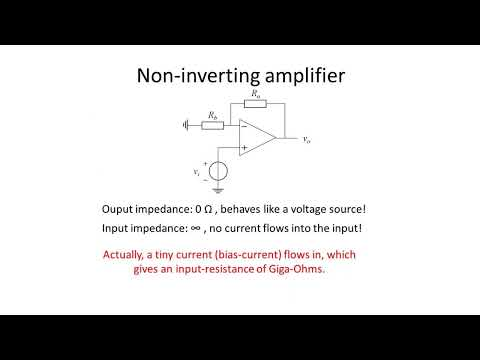

In [1]:
#%python
## PRECAP VIDEO
from IPython.lib.display import YouTubeVideo
YouTubeVideo('d9CisMUZ9HQ', width = 600, height = 450)

## IMPLEMENT & INVESTIGATE: 
> <font color='grey'>⏳ Estimated time: 60 min</font>

You will build the circuit from ANTICIPATE using the ALPACA. Whilst building the circuit take care to connect the +12 and -12 V supplies in the correct fashion. Use the pin diagram of the opamp below to help make the appropriate connections.
You should know by now that the non-inverting input is marked with a (+) and the inverting input with a (-). 

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/7b873596c01a500f66c42c89508ee5aa384b6335/voltammetry/opamp_dual_layout+component.jpg" width="300"/>
</div>

You can place the opamp on the breadboard in the following way:

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi7_4_place_opamp.jpg" width="300"/>
</div>

For this exercise we will use a sine wave with a low amplitude. The majority of the code has already been written for this exercise, but it is your task to finish it. Write the code such that both the input signal that is generated by the DAC, and the output signal from the opamp are acquired (recorded). The skeleton code can be found below, finish the code at the location of the comments. Make sure that the sine wave at the DAC is from **0 to 0.5 V**. Set the frequency of the sine wave to **25 Hz**.

__Important: during this notebook input signal can get amplified. To protect your Cria against large voltages make sure to measure your output signal using the voltmeter before hooking them to any of the measurement pins.__

### Exercise 1

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi7_2_non_invert_circ.jpg" width="500"/>
</div>

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
    
* Build the setup (pictured above) following the instructions below   
* Complete the code below that does the acquisition of the signal

    
<font color='blue'>
- place TL072 opamp(you can see the name written on top of the opamp)
- connect DAC A to non-inverting input(3rd left) <br>
- connect non-inverting input(3rd left) to Ain1 <br>
- connect -12V input(bottom left) to -12V <br>
- connect +12V input(top right) to +12V <br>
- connect 3.3k ohm resistor to inverting input (2nd left) <br>
- connect 1k ohm resistor to inverting input (2nd left) <br>
- connect 3.3k ohm resistor to the ground <br>
- connect 1k ohm resitor to output (top left) - use can use a wire to make it easier <br>
- connect output( top left) to Ain0 <br> 
- nothing on amplifier pathway
</font> 
    

    
<details>
  <summary>Fritzing of how the circuit should look</summary>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi6_4_build.png" width="90%"/>
</details>

### Double check the placement of your resistors in relation to the opamp!

In [1]:
%serialconnect to --port="COM3" 
#switch to alpaca kernel, if you haven't done so yet
#ADD COM PORT ABOVE, e.g. --port="COM3"

import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

# ACQUISITION SETTINGS
NUM_SAMPLES = 200
DELAY_MS = 1 # Sampling delay in ms

"""Instantiate two measurement pints, one for Ain0 the other for Ain1 to measure the input and output signal"""
'''Hint: look what are you importing'''
#adc0 = ??? ## to be adapted
#adc1 = ??? ## to be adapted

### TO DO ='adapt adc0&1'
adc0 =
adc1 = 

input_signal = np.zeros(NUM_SAMPLES) #arrays
output_signal = np.zeros(NUM_SAMPLES)

#"""Complete the line of code to set the output of the DAC to a sine wave with """
#with FuncGen(Sine(Vmax=???, Vmin=???, freq=???)):  
    ## to be adapted to the correct settings: Make sure that the sine wave at the DAC is from 0 to 0.5 V. Set the frequency of the sine wave to 25 Hz.
### TO DO="your funcgen code'
with FuncGen   
 
    for ii in range(NUM_SAMPLES):
        """Perform a measurent of both the input and output signal and store the value""" 
        ## to add code for acquiring from adc0 and 1
### TO DO ="read in sample, with ???.read_u16() and store them in the input_signal &output_signal
        input_signal[ii] = 
        output_signal[ii] = 
        
        time.sleep_ms(DELAY_MS)
        
# Convert integer input/output signal to voltage.
input_signal = input_signal / 65535 * 3.3
output_signal = output_signal / 65535 * 3.3
print(np.max(input_signal), np.max(output_signal))
print('Aquisition done!')




Connecting to --port=COM3 --baud=115200 
Ready.
0.5487663 0.7228427
Aquisition done!


* Complete the code that plots the data and calculates the gain

In [1]:
# Plot
plt.plot(input_signal, label='Input signal')
plt.plot(output_signal, label='Output signal')
plt.ylabel('signal [V]')
plt.xlabel('Measurement number')
plt.legend()

print('Plotting done!')

"""Calculate Vpp for input/output and gain"""
#Vpp_input = ??? ## to be adapted
#Vpp_output = ??? ## to be adapted
#gain = ???       ## to be adapted

### TO DO= 'your code for Vpp in&output and gain
Vpp_input =
Vpp_output = 
gain = 

# Print the results of the calculations
print(f'The Vpp of the input signal is: {Vpp_input:.2f} V')
print(f'The Vpp of the output signal is: {Vpp_output:.2f} V')
print(f'The gain is {gain:.2f}')

Plotting done!
The Vpp of the input signal is: 0.49 V
The Vpp of the output signal is: 0.66 V
The gain is 1.35


> <font size=6>🔥</font>  
>
> <font color='ff6723'>
>
> If you are not getting any output, please verify that:
> * Both USB cables are plugged in
> * The _+12 V_ and _-12 V_ switches are turned to the on position on the ALPACA.
> * Both _+12 V_ and _-12 V_ leds are on
> * You connected to opamp in a correct way

### Exercise 2
Determine the gain of the circuit by using the measured values. What gain did you find? Is it close (enough) to the gain you found in ANTICIPATE?

In [ ]:
### TO DO="# write your answer here: found gain="


You have just shown that the value of the gain of this circuit indeed does depend on the resistors we pick based on the equation you've written in the anticipate. You can however also leave one of the resistors out entirely. In the anticipate, you've made a prediction as to what will happen. 

### Exercise 3
<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
    
* Next remove the resistor Rb and run the code

> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Removing the resistor $R_b$ can be done by disconnecting the connection between $R_b$ and ground. Do not replace it with another wire.
>
> <font>  



Did the circuit function? If so, what gain did you observe? Did this match your prediction?

In [ ]:
### TO DO=" write your observations for removing Rb"


As a last thing in ANTICIPATE you predicted a means of re-arranging the 1 k$\Omega$ and 3.3 k$\Omega$ resistors to get a gain above 4. Let's see if your rearrangement does indeed deliver a sufficiently high gain.

### Exercise 4
__Important: Before modifying the circuit: remove the wire between the output of the circuit and analog in:__ <br>since we now a different gain, again make sure to test your signal using the voltmeter before hooking it up to your analog input pin. <br>__Only in this way you are sure that you properly protect your PicoPi.__

Seriously, it is really easy to fry your alpaca using an opamp. As another safety measure, you can temporarely switch off +/-12 V power supply when you modify the circuit. Just remember to turn them back on!

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
    
* Remove the wire between the output of the circuit and analog in
* Build the circuit by swapping the resistors
* Test whether output stays below 3.5 V with the voltmeter
* If the output voltage is safe: connect the output of the circuit back to analog in Ain0
* Run the acquisition code - you might want to copy it below
* What was the gain you measured? Did your circuit work?

In [ ]:
### TO DO="# write your answer here: measured gain (>4?)"


### Exercise 5
In the previous exercise, we used a very small input voltage of 0.5 V. Let's try using a signal with a larger amplitude, e.g. a $V_{PP}$ of 3.3 V. Obviously, the output voltage of the circuit you built (gain > 4):  would be too high for the PicoPi, which has a maximum analog in voltage of 3.3 V that it can handle.

You can leave the circuit on the breadboard intact, but we are going to adapt the voltage range in which we can measure. This is such that we can use a higher input voltage. <br>


The illustration below shows you how to connect the signal from the output of the opamp circuit to the amplifier of the ALPACA. You'll use the amplifier to attenuate the signal, i.e. reduce its amplitude.
    
The amplifier has no influence on the shape of the signal you will measure, but it will make sure the voltage range is decreased such that it can be measured with the PicoPi. Specifically, you'll set the amplifier such that the amplitude of the signal is reduced by a factor of 10. Using this, you can measure signals up to 33 volt.

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi6_7_build.png" width="90%"/>
</div>

The wire that runs from the output of the opamp towards pin Ain0 we already removed. 
The output of the amplifier is directly linked (via the jumper -or even better wire- AMPLIFIER DIRECT TO NANO) to the Ain0, so make sure the signal from DAC A is linked to Ain1. 


<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
* Remove the cables from the Analog input pins, in order to protect them.
* Make sure to connect the jumpers on the amplifier in the same way as in the picture shown above
    * Place a jumper on Grounded setting in J44, (AMP0 pathway)
* Remove jumpers from positions not indicated by the picture
* Connect the output of the opamp to the input of the attenuator (*SIGNAL+* pin at *AMP0 IN*)
* Make a direct connection between the output of the amplifier and the PicoPi by placing a wire (which is easier to remove than a jumper) on the topmost position of *AMPLIFIER DIRECT TO NANO*. If unclear, consult the illustration above.
* Do not place a jumper on the lower position.
* Keep *DAC A* linked to *Ain1*. 

> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Tip: Make a habit out of disconnecting the circuit from the Analog Input Pins every time you make changes to the circuit.
>
> <font>  
    
> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Tip: Instead of using a jumper at *AMPLIFIER DIRECT TO NANO*, consider using a wire to bridge the connection instead. It is easier to place and remove!
>
> <font>  

Because you can now detect signal up to 33 V on the output of the opamp circuit, you can increase the amplitude of our sine wave. For this purpose you can alter a variable in the code your wrote above. Slowly increase the amplitude with steps of around 0.5 and observe what happens.



In [ ]:
%serialconnect to --port="COM3" 
#ADD COM PORT ABOVE, e.g. --port="COM3"

import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

adc0 = ADC(26) 
adc1 = ADC(27)

input_signal = []
output_signal = []

for v_max in np.arange(0.5, 3.5, 0.5):
    with FuncGen(Sine(Vmax=v_max, Vmin=0, freq=25)):
        
        print(f'Analyzing Vpp = {v_max} V')
        time.sleep_ms(150) # Let the DAC settle
        
        for _ in range(200 if v_max == 3 else 50):
            input_signal.append(adc1.read_u16())
            output_signal.append(adc0.read_u16())
            time.sleep_ms(1)
        
# Convert integer input/output signal to voltage.
input_signal = np.array(input_signal) / 65535 * 3.3
output_signal = np.array(output_signal) / 65535 * 3.3 * 10

print('Aquisition done!')

In [ ]:
plt.plot(input_signal, label='Input signal')
plt.plot(output_signal, label='Output signal')
plt.ylabel('signal [V]')
plt.xlabel('Measurement number')
plt.grid()
plt.legend()

for ii in range (6):
    Vin=np.max(input_signal[0+ii*50:50+ii*50])
    Vout=np.max(output_signal[0+ii*50:50+ii*50])
    print('for V='+str(Vin)+' Vout is '+str(Vout)+', ratio is '+str(Vout/Vin))

### Exercise 6
What happens to the output signal? Explain what is happening here, for this you might want to look at the maximum voltage of the output signal.

> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Hint: the observed signal is directly related to the opamp circuit you build. The amplifier we use to shift the voltage range does not change the shape of the output signal.
>
> <font>  

In [ ]:
### TO DO="explain what happens to the output signal"



What you saw in the previous exercise is called **clipping**.

### Exercise 7
**Hypothetically, i.e. don't do the actual measurement:** If the input signal would have a DC offset of 0 Volt, and we increase the amplitude enough, explain whether we would also observe this clipping behaviour for the part where the sine wave is negative? (Ignore the fact that amplifier removes voltage <0)

In [ ]:
### TO DO="# write your answer here: Dc offset 0, also clipping at negative sine?"



## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 15 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 


**to be checked off by a TA:**
1. Explain when you encounter clipping, e.g. at which (positive/negative) voltages, and what then happens to the gain and the shape of the signal.

2. Why is non invering opamp called like that? What is its gain?

3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,

4. How do think this notebook could be improved?

In [ ]:
#12A non-inverting opamp
### TO DO ="1. When do you encounter clipping? What happens to the gain and shape at clipping?"

### TO DO="2.explain why the used circuit is called a non-inverting opamp, and what is its gain?"

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"



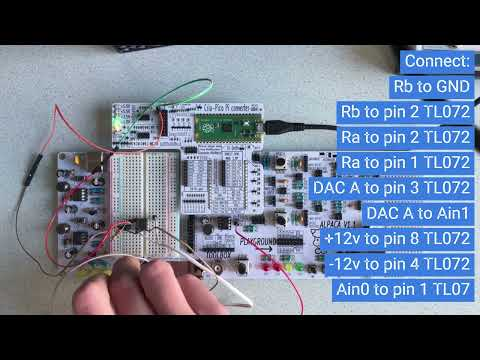

In [2]:
%python # when being used in alpaca kernel
# recording
from IPython.lib.display import YouTubeVideo
YouTubeVideo('uZJXWCui1Y8', width = 600, height = 450)
